In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False



In [6]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [7]:
plt.rc('font', family='NanumBarunGothic') 

In [8]:
member = pd.read_csv('Member_data02.csv')
member.head()

,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부
0,2.018123e+14,여,기혼,인천,37.0,국민은행,인스타그램,Yes
1,2.018123e+14,여,기혼,제주,33.0,국민은행,검색광고,Yes
2,2.018123e+14,여,기혼,부산,32.0,하나은행,네이버블로그,Yes
3,2.018123e+14,여,미혼,경남,34.0,기업은행,지인추천,No
4,2.018123e+14,여,기혼,서울,32.0,신한은행,직접검색,Yes


In [9]:
product = pd.read_csv('Product_data.csv')
product.head()

,물품대분류,상품명,물품판매량,제품단가
0,FC,(1+1) 좋은느낌 입는 오버나이트 대형 8개입,15,0
1,FC,(1+1) 좋은느낌 입는 오버나이트 중형 8개입,10,0
2,FC,(1+1) 화이트 입는 오버나이트 대형 L 8개입 (EA),27,0
3,FC,(1+1) 화이트 입는 오버나이트 중형 M 8개입 (EA),12,0
4,FC,(핫딜위크/1+1) 좋은느낌 입는 오버나이트 대형 8개입,4,0


In [10]:
sales = pd.read_csv('Sales_data02.csv')
sales.head()

C:\Users\king\AppData\Local\Temp\ipykernel_12924\175188574.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  sales = pd.read_csv('Sales_data02.csv')


,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입)
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형)
2,201902282095385,2019-02-28,2019-03-01,2019-03-05,NaN,201812310749770,5610,3800,FMC,크리넥스？키즈용？화장지？3겹？27m 8롤
3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형)
4,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640,39788,기저귀,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형)


In [11]:
member.info()
member.isnull().sum()
member

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81360 entries, 0 to 81359
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      81094 non-null  float64
 1   성별      81094 non-null  object 
 2   결혼유무    81094 non-null  object 
 3   거주지역    81094 non-null  object 
 4   연령      81094 non-null  float64
 5   결제등록카드  81094 non-null  object 
 6   유입경로    81094 non-null  object 
 7   자녀여부    81094 non-null  object 
dtypes: float64(2), object(6)
memory usage: 5.0+ MB


,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부
0,2.018123e+14,여,기혼,인천,37.0,국민은행,인스타그램,Yes
1,2.018123e+14,여,기혼,제주,33.0,국민은행,검색광고,Yes
2,2.018123e+14,여,기혼,부산,32.0,하나은행,네이버블로그,Yes
3,2.018123e+14,여,미혼,경남,34.0,기업은행,지인추천,No
4,2.018123e+14,여,기혼,서울,32.0,신한은행,직접검색,Yes
...,...,...,...,...,...,...,...,...
81355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# 결측 row 제거하기, all : 한 행이 모드 missing value이면 제거
member = member.dropna(how='all')
member
member['ID']=member['ID'].apply(lambda x: str(int(x)))
member['연령']=member['연령'].apply(lambda x: int(x))
member.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81094 entries, 0 to 81093
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      81094 non-null  object
 1   성별      81094 non-null  object
 2   결혼유무    81094 non-null  object
 3   거주지역    81094 non-null  object
 4   연령      81094 non-null  int64 
 5   결제등록카드  81094 non-null  object
 6   유입경로    81094 non-null  object
 7   자녀여부    81094 non-null  object
dtypes: int64(1), object(7)
memory usage: 5.6+ MB


C:\Users\king\AppData\Local\Temp\ipykernel_12924\3047925929.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  member['ID']=member['ID'].apply(lambda x: str(int(x)))
C:\Users\king\AppData\Local\Temp\ipykernel_12924\3047925929.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  member['연령']=member['연령'].apply(lambda x: int(x))


In [13]:
sales['고객번호']=sales['고객번호'].apply(lambda x: str(int(x)))
# sales['구매연월'] = sales['구매일']
sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   주문번호       199999 non-null  object 
 1   구매일        199999 non-null  object 
 2   배송시작일      199999 non-null  object 
 3   배송완료일      199999 non-null  object 
 4   구매시월령(수정)  168142 non-null  float64
 5   고객번호       199999 non-null  object 
 6   구매금액       199999 non-null  int64  
 7   결제금액       199999 non-null  int64  
 8   물품대분류      199999 non-null  object 
 9   상품명        199999 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 15.3+ MB


In [14]:
sales_merge1 = pd.merge(sales, member, how = 'left', left_on = '고객번호', right_on = 'ID').dropna()
sales_merge1

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),201812310749735,여,기혼,인천,37.0,국민은행,인스타그램,Yes
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),201812310749735,여,기혼,인천,37.0,국민은행,인스타그램,Yes
3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),201812310749771,여,기혼,부산,32.0,하나은행,네이버블로그,Yes
4,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640,39788,기저귀,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),201812310749774,여,미혼,경남,34.0,기업은행,지인추천,No
5,201907282649358,2019-07-29,2019-07-30,2019-08-02,8.0,201812310749774,101280,76744,기저귀,[2019년형] 하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),201812310749774,여,미혼,경남,34.0,기업은행,지인추천,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199577,201912293246297,2019-12-29,2019-12-30,2020-01-01,7.0,201912291058168,52320,37834,기저귀,하기스 네이처메이드 4단계 여아 108매(밴드형),201912291058168,여,기혼,충북,26.0,삼성카드,검색광고,Yes
199578,202001313357732,2020-02-01,2020-02-02,2020-02-04,8.0,201912291058168,53920,45971,팬티,하기스 네이처메이드 팬티 3단계 여아 116매(팬티형),201912291058168,여,기혼,충북,26.0,삼성카드,검색광고,Yes
199579,202002033367542,2020-02-04,2020-02-05,2020-02-07,8.0,201912291058168,5900,5841,체험팩,NEW 하기스 맥스드라이 팬티 3단계 공용 20매(팬티형/체험팩),201912291058168,여,기혼,충북,26.0,삼성카드,검색광고,Yes
199580,20200718082624-57943215331,2020-07-18,2020-07-19,2020-07-23,13.0,201912291058168,99800,73588,팬티,하기스 NEW 네이처메이드 썸머팬티 4단계 공용 82매(팬티형),201912291058168,여,기혼,충북,26.0,삼성카드,검색광고,Yes


findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
C:\Users\king\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\king\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51

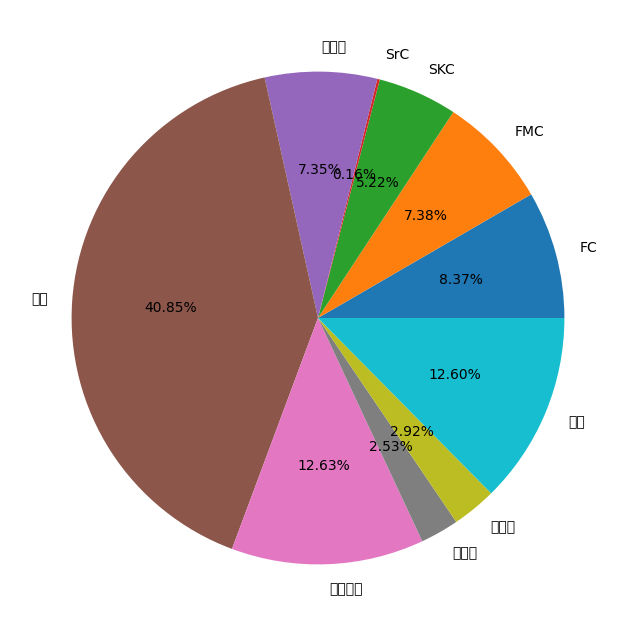

In [15]:
data = product.groupby('물품대분류').count()['상품명']
plt.figure(figsize=(8,8))
plt.pie(data, labels =data.index, autopct='%.2f%%')
plt.show()

In [16]:
member1 =member
member1

,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부
0,201812310749735,여,기혼,인천,37,국민은행,인스타그램,Yes
1,201812310749770,여,기혼,제주,33,국민은행,검색광고,Yes
2,201812310749771,여,기혼,부산,32,하나은행,네이버블로그,Yes
3,201812310749774,여,미혼,경남,34,기업은행,지인추천,No
4,201812310749780,여,기혼,서울,32,신한은행,직접검색,Yes
...,...,...,...,...,...,...,...,...
81089,201912291058164,여,기혼,경기,31,국민은행,오픈마켓,Yes
81090,201912291058167,여,기혼,경남,37,롯데카드,오픈마켓,Yes
81091,201912291058168,여,기혼,충북,26,삼성카드,검색광고,Yes
81092,201912291058169,여,기혼,경기,32,새마을금고,인스타그램,Yes


In [17]:
member.groupby(['유입경로'])[['ID']].count()

,ID
유입경로,
검색광고,8259
네이버블로그,22684
네이버카페,5725
매장쿠폰,456
오픈마켓,2022
이마트,218
인스타그램,31167
지인추천,8021
직접검색,1137


In [18]:
path_ct =  pd.pivot_table(data = member, index = '유입경로', columns = '성별', values = 'ID', aggfunc = 'count')
path_ct

성별,남,여
유입경로,,
검색광고,244,8015
네이버블로그,708,21976
네이버카페,185,5540
매장쿠폰,12,444
오픈마켓,66,1956
이마트,11,207
인스타그램,965,30202
지인추천,242,7779
직접검색,30,1107


findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
C:\Users\king\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\king\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph

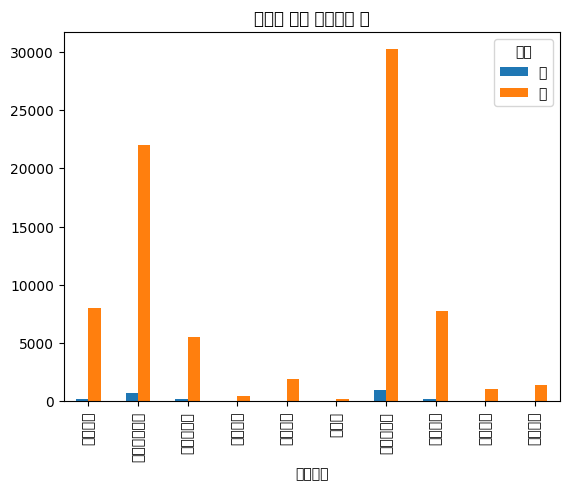

In [19]:
path_ct.plot(kind='bar', title='성별에 따른 유입경로 수')
plt.show()

In [20]:
# df = df.replace(-500, 0)
# 고객데이터를 숫자형태로 바꿔라 멤버데이터만 가지고 고객번호 바꾸지말고 노멀라이징을 하고 클러스터링해봐 고객 특성 산점도 그래프 를 찍어보고 
path_range = {'유입경로' : {'인스타그램':0, '네이버블로그':1, '검색광고': 2, '지인추천':3, '네이버카페':4, '오픈마켓':5, '페이스북':6, '직접검색':7, '매장쿠폰':8, '이마트':9}}

member1 = member.replace(path_range)
member1

,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부
0,201812310749735,여,기혼,인천,37,국민은행,0,Yes
1,201812310749770,여,기혼,제주,33,국민은행,2,Yes
2,201812310749771,여,기혼,부산,32,하나은행,1,Yes
3,201812310749774,여,미혼,경남,34,기업은행,3,No
4,201812310749780,여,기혼,서울,32,신한은행,7,Yes
...,...,...,...,...,...,...,...,...
81089,201912291058164,여,기혼,경기,31,국민은행,5,Yes
81090,201912291058167,여,기혼,경남,37,롯데카드,5,Yes
81091,201912291058168,여,기혼,충북,26,삼성카드,2,Yes
81092,201912291058169,여,기혼,경기,32,새마을금고,0,Yes


In [21]:
# 고유번호 ID빼고 나머지 것들을 숫자로 바꾸기
import numpy as np
column_names=['성별','결혼유무','거주지역','결제등록카드', '자녀여부']
for i in column_names:
  temp_list=member1[i].unique()
  member1[i]=member1[i].apply(lambda x: np.where(temp_list==x)[0][0])

member1

,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부
0,201812310749735,0,0,0,37,0,0,0
1,201812310749770,0,0,1,33,0,2,0
2,201812310749771,0,0,2,32,1,1,0
3,201812310749774,0,1,3,34,2,3,1
4,201812310749780,0,0,4,32,3,7,0
...,...,...,...,...,...,...,...,...
81089,201912291058164,0,0,5,31,0,5,0
81090,201912291058167,0,0,3,37,9,5,0
81091,201912291058168,0,0,6,26,18,2,0
81092,201912291058169,0,0,5,32,13,0,0


In [22]:
# 2차원으로 축소
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
std_scaler.fit(member1.iloc[:,1:8])
data=std_scaler.transform(member1.iloc[:,1:8])

from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(data)
data_pca=pca.transform(data)
data_pca.shape

(81094, 2)

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

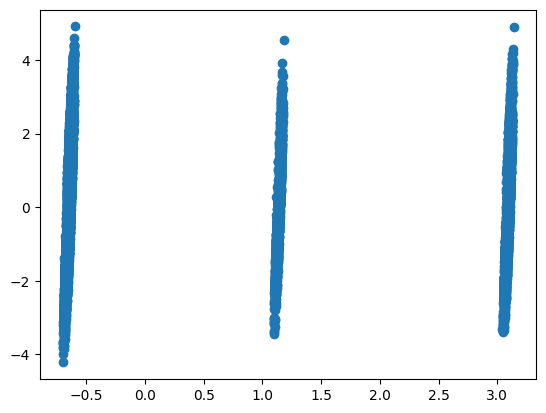

In [23]:
plt.scatter(data_pca[:,0],data_pca[:,1])
plt.show()

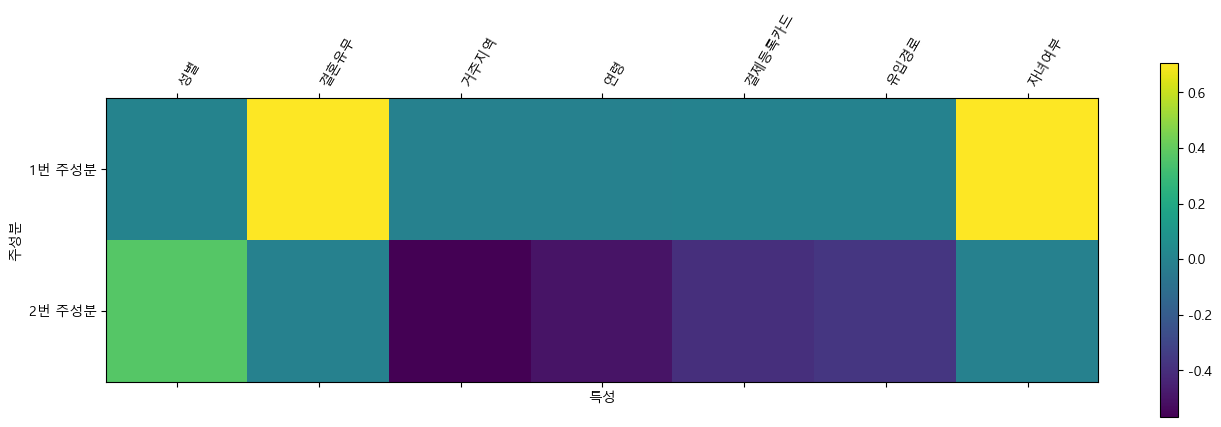

In [35]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],['1번 주성분','2번 주성분'])
plt.colorbar()
plt.xticks(range(7),member1.columns[1:8],rotation=60,ha='left')
plt.xlabel('특성')
plt.ylabel('주성분')
plt.show()

In [25]:
# K-means clustering
# 필요 패키지 불러오기 (KMeans, matplotlib, preprocessing)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import preprocessing

# 원본 데이터를 복사해서 전처리하기 (원본 데이터를 가지고 바로 전처리하지 않는다)
processed_data = member1.copy()

# 데이터 전처리 - 정규화를 위한 작업
scaler = preprocessing.MinMaxScaler()
processed_data[['성별', '유입경로']] = scaler.fit_transform(processed_data[['성별', '유입경로']])

# 화면(figure) 생성
plt.figure(figsize = (10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [26]:

# 3차원 축소
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

std_scaler=StandardScaler()
std_scaler.fit(member1.iloc[:,1:8])
data=std_scaler.transform(member1.iloc[:,1:8])

from sklearn.decomposition import PCA
pca3=PCA(n_components=3)

data_pca3=pca3.fit_transform(data)
data_pca3.shape


(81094, 3)

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

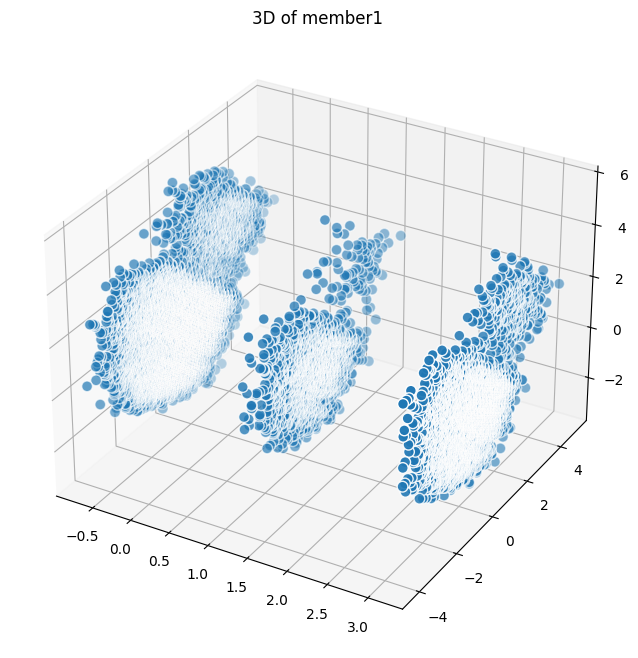

In [27]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca3[:,0], data_pca3[:,1], data_pca3[:,2], s=60, edgecolors='white')
ax.set_title('3D of member1')
plt.show()

In [28]:
# K-means Clustering

# 2차원으로 축소
# from sklearn.preprocessing import StandardScaler
# std_scaler=StandardScaler()
# std_scaler.fit(member1.iloc[:,1:8])
# data=std_scaler.transform(member1.iloc[:,1:8])

# from sklearn.decomposition import PCA
# pca=PCA(n_components=2)
# pca.fit(data)
# data_pca=pca.transform(data)
# data_pca.shape
df_pca2 = pd.DataFrame(data_pca, columns = ['PC1', 'PC2'])
df_pca2

,PC1,PC2
0,-0.638230,1.075674
1,-0.634139,1.172943
2,-0.633337,1.315350
3,3.096779,0.283456
4,-0.648876,-0.400035
...,...,...
81089,-0.644811,0.236345
81090,-0.658049,-1.095471
81091,-0.638445,0.253727
81092,-0.645314,0.176367


In [29]:
# KMeans 라이브러리를 불러오기
from sklearn.cluster import KMeans
sum_of_squared_distance = []
# 9개만 구해본다.
K = range(1,10)
# 1부터 9까지의 for문 반복을 통해 각 Kmeans의 군집을 몇개까지 하면 될지 측정
for k in K:
  km = KMeans(n_clusters = k)
  km = km.fit(df_pca2)
  sum_of_squared_distance.append(km.inertia_)
# inertia_함수를 이용해 군집간 거리가 최소가 되는 k를 누적하여 파악한다.




findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

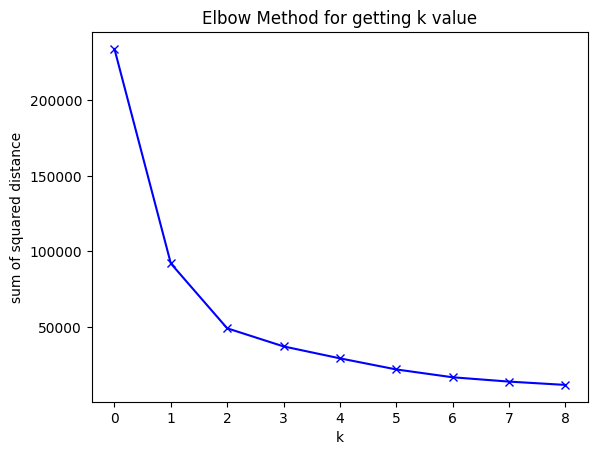

In [30]:
# 군집의 개수를 정하기 위해(군집의 중심이 될 점 centroid의 개수를 정하기)
plt.plot(sum_of_squared_distance, '-bx')
plt.xlabel('k')
plt.ylabel('sum of squared distance')  
plt.title('Elbow Method for getting k value') 
plt.show()
# 완만해지기 전까지가 유의미한 데이터들, 결과 k에 3을 넣어보자

In [31]:
kmeans = KMeans(n_clusters =3, random_state=50)
kmeans.fit(df_pca2)
label_kmc = kmeans.labels_
label_kmc = pd.Series(label_kmc)
df_pca2['label_kmc'] = label_kmc.values
df_pca2


,PC1,PC2,label_kmc
0,-0.638230,1.075674,0
1,-0.634139,1.172943,0
2,-0.633337,1.315350,0
3,3.096779,0.283456,2
4,-0.648876,-0.400035,1
...,...,...,...
81089,-0.644811,0.236345,0
81090,-0.658049,-1.095471,1
81091,-0.638445,0.253727,0
81092,-0.645314,0.176367,0


findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

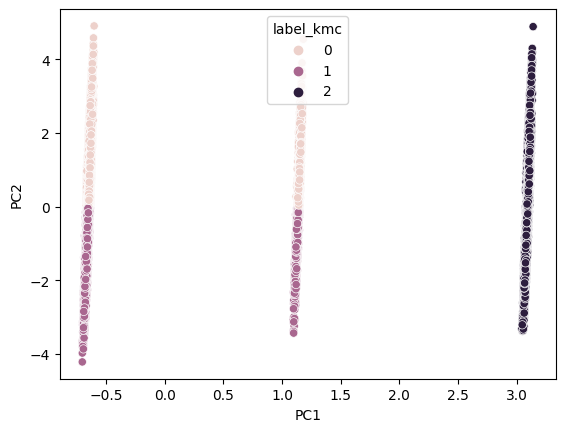

In [32]:
import seaborn as sns
# 구한 k 값을 바탕으로 K-Means진행하기
sns.scatterplot(data = df_pca2, x = 'PC1', y = 'PC2', hue = 'label_kmc');

In [33]:
# DB scan
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps = 0.2)
dbs.fit(data_pca)
label_dbs = dbs.labels_
print(label_dbs)
# 시각화를 위한 데이터프레임 생성
df_dbs_pca2 = pd.DataFrame(data_pca, columns = ['PC1', 'PC2'])
df_dbs_pca2['label_dbs'] = label_dbs
df_dbs_pca2.head()

[0 0 0 ... 0 0 0]


,PC1,PC2,label_dbs
0,-0.638230,1.075674,0
1,-0.634139,1.172943,0
2,-0.633337,1.315350,0
3,3.096779,0.283456,1
4,-0.648876,-0.400035,0
